### Stochastic SIR model (discrete state, continuous time) in R

In [1]:
library(reshape2)

In [2]:
sir <- function(beta, gamma, N, S0, I0, R0, tf) {
    time <- 0
    S <- S0
    I <- I0
    R <- R0
    ta <- numeric(0)
    Sa <- numeric(0)
    Ia <- numeric(0)
    Ra <- numeric(0)
    while (time < tf) {
        ta <- c(ta, time)
        Sa <- c(Sa, S)
        Ia <- c(Ia, I)
        Ra <- c(Ra, R)
        pf1 <- beta * S * I
        pf2 <- gamma * I
        pf <- pf1 + pf2
        dt <- rexp(1, rate = pf)
        time <- time + dt
        if (time > tf) {
            break
        }
        ru <- runif(1)
        if (ru < (pf1/pf)) {
            S <- S - 1
            I <- I + 1
        } else {
            I <- I - 1
            R <- R + 1
        }
        if (I == 0) {
            break
        }
    }
    results <- data.frame(time = ta, S = Sa, I = Ia, R = Ra)
    return(results)
}

In [3]:
set.seed(42)

In [4]:
sir_out <- sir(0.1/1000,0.05,1000,999,1,0,200)

In [5]:
if(dim(sir_out)[1]==1){
    sir_out <- sir(0.1/1000,0.05,1000,999,1,0,200)
}

In [6]:
head(sir_out)

time      S   I R
1  0.000000 999 1 0
2  1.891201 998 2 0
3  3.470562 997 3 0
4  4.169704 997 2 1
5  8.149657 996 3 1
6 11.145904 995 4 1

In [7]:
sir_out_long <- melt(sir_out,"time")

#### Visualisation

In [8]:
library(ggplot2)

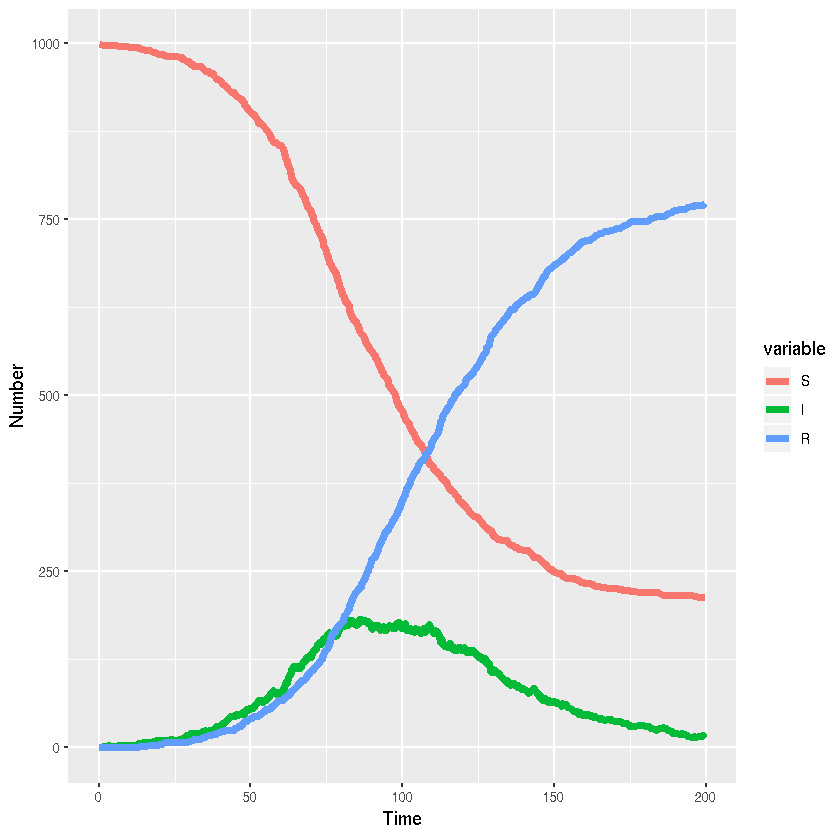

In [9]:
ggplot(sir_out_long,aes(x=time,y=value,colour=variable,group=variable))+
  # Add line
  geom_line(lwd=2)+
  #Add labels
  xlab("Time")+ylab("Number")